In [1]:
'''Titanic training model with Decision Tree algorithmic'''
import pandas
raw_data = pandas.read_csv("U4_04_train.csv")
print(raw_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [2]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

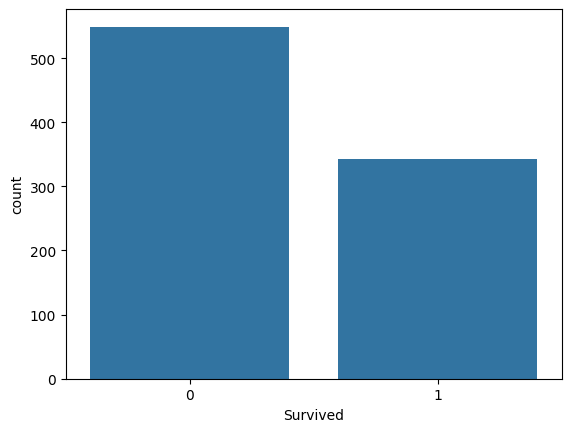

In [5]:
import seaborn
seaborn.countplot(x="Survived", data=raw_data)

<Axes: xlabel='Survived', ylabel='count'>

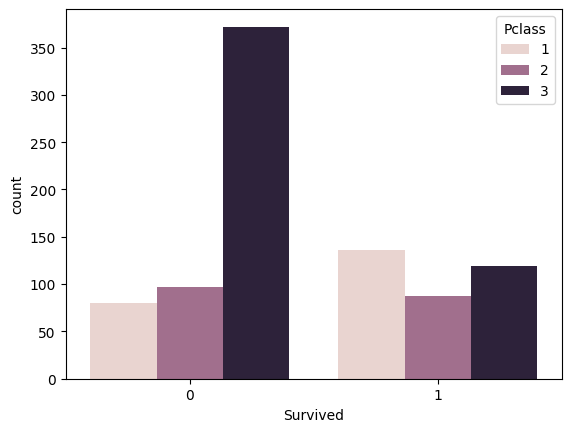

In [6]:
seaborn.countplot(x="Survived", data=raw_data, hue="Pclass")

<Axes: xlabel='Survived', ylabel='count'>

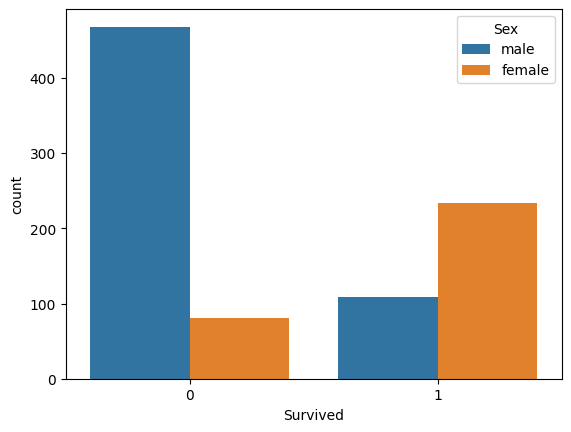

In [7]:
seaborn.countplot(x="Survived", data=raw_data, hue="Sex")

In [8]:
raw_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
raw_data["Cabin"].isna()

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

In [10]:
raw_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

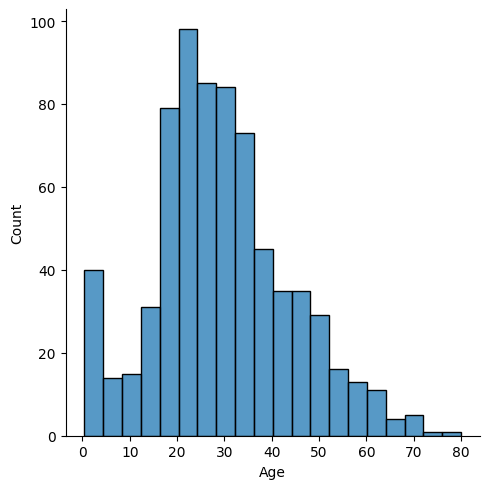

In [11]:
seaborn.displot(x="Age", data=raw_data)

In [12]:
raw_data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [13]:
raw_data["Age"].mean()

np.float64(29.69911764705882)

In [14]:
raw_data["Age"].fillna(raw_data["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [15]:
raw_data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [16]:
raw_data.Age = raw_data["Age"].fillna(raw_data["Age"].mean())

In [17]:
raw_data["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [18]:
raw_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
raw_data = raw_data.drop(["Cabin"], axis=1)

In [20]:
raw_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [21]:
raw_data = raw_data.dropna()

In [22]:
raw_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [24]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
raw_data = raw_data.drop(["PassengerId", "Name", "Ticket"], axis=1)

In [26]:
raw_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [27]:
dummies_sex = pandas.get_dummies(raw_data["Sex"])
dummies_sex

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [28]:
dummies_sex = pandas.get_dummies(raw_data["Sex"], drop_first=True, dtype="int")
dummies_sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [29]:
raw_data = raw_data.join(dummies_sex)
raw_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.000000,1,0,7.2500,S,1
1,1,1,female,38.000000,1,0,71.2833,C,0
2,1,3,female,26.000000,0,0,7.9250,S,0
3,1,1,female,35.000000,1,0,53.1000,S,0
4,0,3,male,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1
887,1,1,female,19.000000,0,0,30.0000,S,0
888,0,3,female,29.699118,1,2,23.4500,S,0
889,1,1,male,26.000000,0,0,30.0000,C,1


In [30]:
raw_data = raw_data.drop(["Sex"], axis=1)
raw_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.000000,1,0,7.2500,S,1
1,1,1,38.000000,1,0,71.2833,C,0
2,1,3,26.000000,0,0,7.9250,S,0
3,1,1,35.000000,1,0,53.1000,S,0
4,0,3,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,S,1
887,1,1,19.000000,0,0,30.0000,S,0
888,0,3,29.699118,1,2,23.4500,S,0
889,1,1,26.000000,0,0,30.0000,C,1


In [31]:
dummies_embarked = pandas.get_dummies(raw_data["Embarked"], drop_first=True, dtype="int")
dummies_embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [32]:
raw_data = raw_data.join(dummies_embarked)
raw_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.000000,1,0,7.2500,S,1,0,1
1,1,1,38.000000,1,0,71.2833,C,0,0,0
2,1,3,26.000000,0,0,7.9250,S,0,0,1
3,1,1,35.000000,1,0,53.1000,S,0,0,1
4,0,3,35.000000,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,S,1,0,1
887,1,1,19.000000,0,0,30.0000,S,0,0,1
888,0,3,29.699118,1,2,23.4500,S,0,0,1
889,1,1,26.000000,0,0,30.0000,C,1,0,0


In [33]:
raw_data = raw_data.drop("Embarked", axis=1)
raw_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [34]:
clean_data = raw_data[:]
clean_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<Axes: >

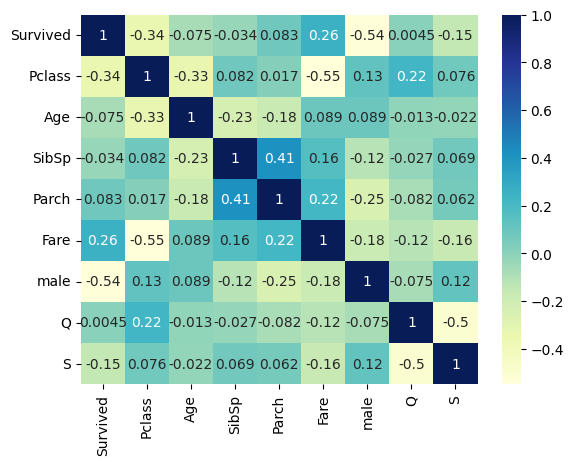

In [35]:
seaborn.heatmap(clean_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

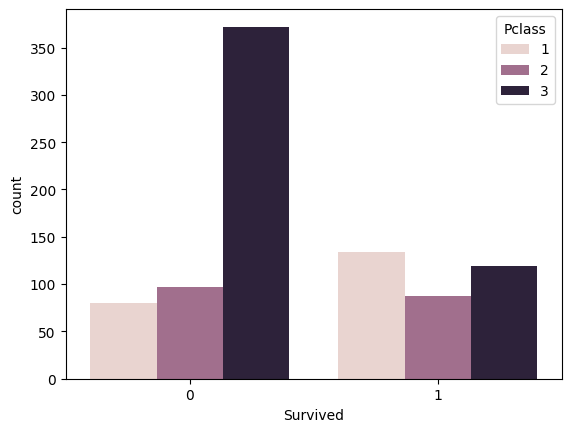

In [36]:
seaborn.countplot(x="Survived", data=clean_data, hue="Pclass")

In [37]:
x = clean_data.drop(["Survived"], axis=1)
x

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.000000,1,0,7.2500,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0
2,3,26.000000,0,0,7.9250,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1
4,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,0,1
887,1,19.000000,0,0,30.0000,0,0,1
888,3,29.699118,1,2,23.4500,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0


In [38]:
y = clean_data["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
x_training, x_testing, y_training, y_testing = train_test_split(x, y, test_size=.2)

In [40]:
# Training a model with Logistic Regression
from sklearn.linear_model import LogisticRegression
my_regression_model = LogisticRegression(max_iter=2000)
my_regression_model.fit(X=x_training, y=y_training)
# Note: When the model has more iterations (max_iter) improve its accuracy... but 
# we need to be careful to don't overfit it 

LogisticRegression(max_iter=2000)

In [41]:
predictions = my_regression_model.predict(x_testing)
predictions

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1])

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_testing, predictions)

0.7921348314606742

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_testing, predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       111
           1       0.76      0.66      0.70        67

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



In [44]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_testing, predictions))

[[97 14]
 [23 44]]


In [45]:
pandas.DataFrame(confusion_matrix(y_testing, predictions), columns=["Predictions: No", "Predictions: Yes"], index=["Real: No", "Real: Yes"])

,Predictions: No,Predictions: Yes
Real: No,97,14
Real: Yes,23,44


In [46]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [47]:
new_person = [3, 20, 0, 0, 100, 1, 0, 0]
prediction = my_regression_model.predict([new_person])
prediction
if prediction[0] == 0:
    print("Death")
else:
    print("Survive!")

Death


c:\Users\aleja\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [48]:
# Training a model with Decision Tree
from sklearn.tree import DecisionTreeClassifier
my_decision_tree_model = DecisionTreeClassifier(max_depth=50)

In [49]:
my_decision_tree_model.fit(x_training, y_training)

DecisionTreeClassifier(max_depth=50)

In [50]:
predictions_tree = my_decision_tree_model.predict(x_testing)

In [51]:
# Know the accuracy of the model    
from sklearn.metrics import accuracy_score
accuracy_score(y_testing, predictions_tree)

0.8089887640449438

In [69]:
# Figure out what is the best level of deep we need to use according the accuracy score
results = {}
criterion_list = ['gini', 'entropy', 'log_loss']
better_accuracy = 0
most_accuracy_criterion = ''
most_depth_accuracy = 0
for cri in criterion_list:
    group = []
    for j in range(1, 21):
        my_decision_tree_model = DecisionTreeClassifier(criterion=cri, max_depth=j)
        my_decision_tree_model.fit(x_training, y_training)
        prediction = my_decision_tree_model.predict(x_testing)
        accuracy = accuracy_score(y_testing, prediction)
        # print(f"Deep of level: {i} accuracy score: {accuracy}")
        group.append(accuracy)
        if accuracy > better_accuracy:
            better_accuracy = accuracy
            most_accuracy_criterion = cri
            most_depth_accuracy = j
    results[cri] = group
print(results)

{'gini': [0.7752808988764045, 0.7696629213483146, 0.8314606741573034, 0.8202247191011236, 0.8258426966292135, 0.8426966292134831, 0.8426966292134831, 0.8426966292134831, 0.8426966292134831, 0.8370786516853933, 0.848314606741573, 0.8314606741573034, 0.8426966292134831, 0.8258426966292135, 0.8258426966292135, 0.8202247191011236, 0.8202247191011236, 0.8314606741573034, 0.8033707865168539, 0.8089887640449438], 'entropy': [0.7752808988764045, 0.7696629213483146, 0.8258426966292135, 0.8146067415730337, 0.8146067415730337, 0.8202247191011236, 0.8202247191011236, 0.8258426966292135, 0.8258426966292135, 0.8258426966292135, 0.797752808988764, 0.8146067415730337, 0.797752808988764, 0.8202247191011236, 0.8202247191011236, 0.8202247191011236, 0.8146067415730337, 0.8146067415730337, 0.8089887640449438, 0.8033707865168539], 'log_loss': [0.7752808988764045, 0.7696629213483146, 0.8258426966292135, 0.8146067415730337, 0.8146067415730337, 0.8202247191011236, 0.8146067415730337, 0.8202247191011236, 0.8258

In [70]:
print(f"Most accuracy score is: {better_accuracy} with a level depth of: {most_depth_accuracy} that belongs the criterion: {most_accuracy_criterion}")

Most accuracy score is: 0.848314606741573 with a level depth of: 11 that belongs the criterion: gini


<Axes: >

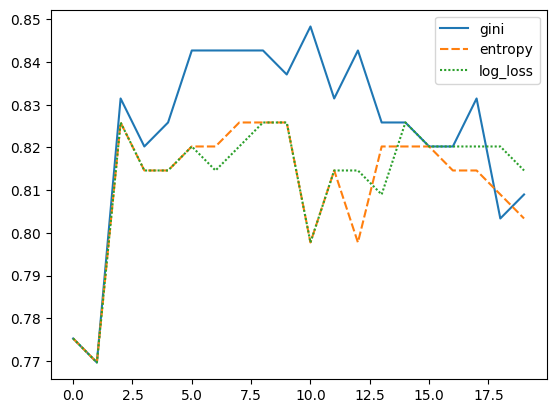

In [71]:
seaborn.lineplot(data=results)

In [75]:
# Confirm if the best result is ok
print(results['gini'][11 - 1])

0.848314606741573


In [ ]:
# Create and train the best model with the exactly depth and criterion values
my_decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth=11)
my_decision_tree_model.fit(x_training, y_training)
predictions = my_decision_tree_model.predict(x_testing)
accuracy = accuracy_score(y_testing, predictions)
print(accuracy)


0.848314606741573


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_testing, predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       111
           1       0.84      0.73      0.78        67

    accuracy                           0.85       178
   macro avg       0.85      0.83      0.83       178
weighted avg       0.85      0.85      0.85       178



In [84]:
pandas.DataFrame(confusion_matrix(y_testing, predictions), columns=["Predictions: Yes", "Predictions: No"], index=["Real: Yes", "Real: No"])

,Predictions: Yes,Predictions: No
Real: Yes,102,9
Real: No,18,49


In [87]:
x_training.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

[Text(0.530422794117647, 0.9583333333333334, 'male <= 0.5\n0.473\n711\n[438, 273]\nDEATH'),
 Text(0.2696691176470588, 0.875, 'Pclass <= 2.5\n0.384\n255\n[66, 189]\nSURVIVED'),
 Text(0.4000459558823529, 0.9166666666666667, 'True  '),
 Text(0.13161764705882353, 0.7916666666666666, 'Age <= 2.5\n0.108\n140\n[8, 132]\nSURVIVED'),
 Text(0.09705882352941177, 0.7083333333333334, 'Pclass <= 1.5\n0.5\n2\n[1, 1]\nDEATH'),
 Text(0.08529411764705883, 0.625, '0.0\n1\n[1, 0]\nDEATH'),
 Text(0.10882352941176471, 0.625, '0.0\n1\n[0, 1]\nSURVIVED'),
 Text(0.1661764705882353, 0.7083333333333334, 'Fare <= 28.856\n0.096\n138\n[7, 131]\nSURVIVED'),
 Text(0.1323529411764706, 0.625, 'Fare <= 28.231\n0.175\n62\n[6, 56]\nSURVIVED'),
 Text(0.12058823529411765, 0.5416666666666666, 'Age <= 56.0\n0.15\n61\n[5, 56]\nSURVIVED'),
 Text(0.08823529411764706, 0.4583333333333333, 'Age <= 27.5\n0.126\n59\n[4, 55]\nSURVIVED'),
 Text(0.058823529411764705, 0.375, 'Age <= 25.5\n0.236\n22\n[3, 19]\nSURVIVED'),
 Text(0.035294117

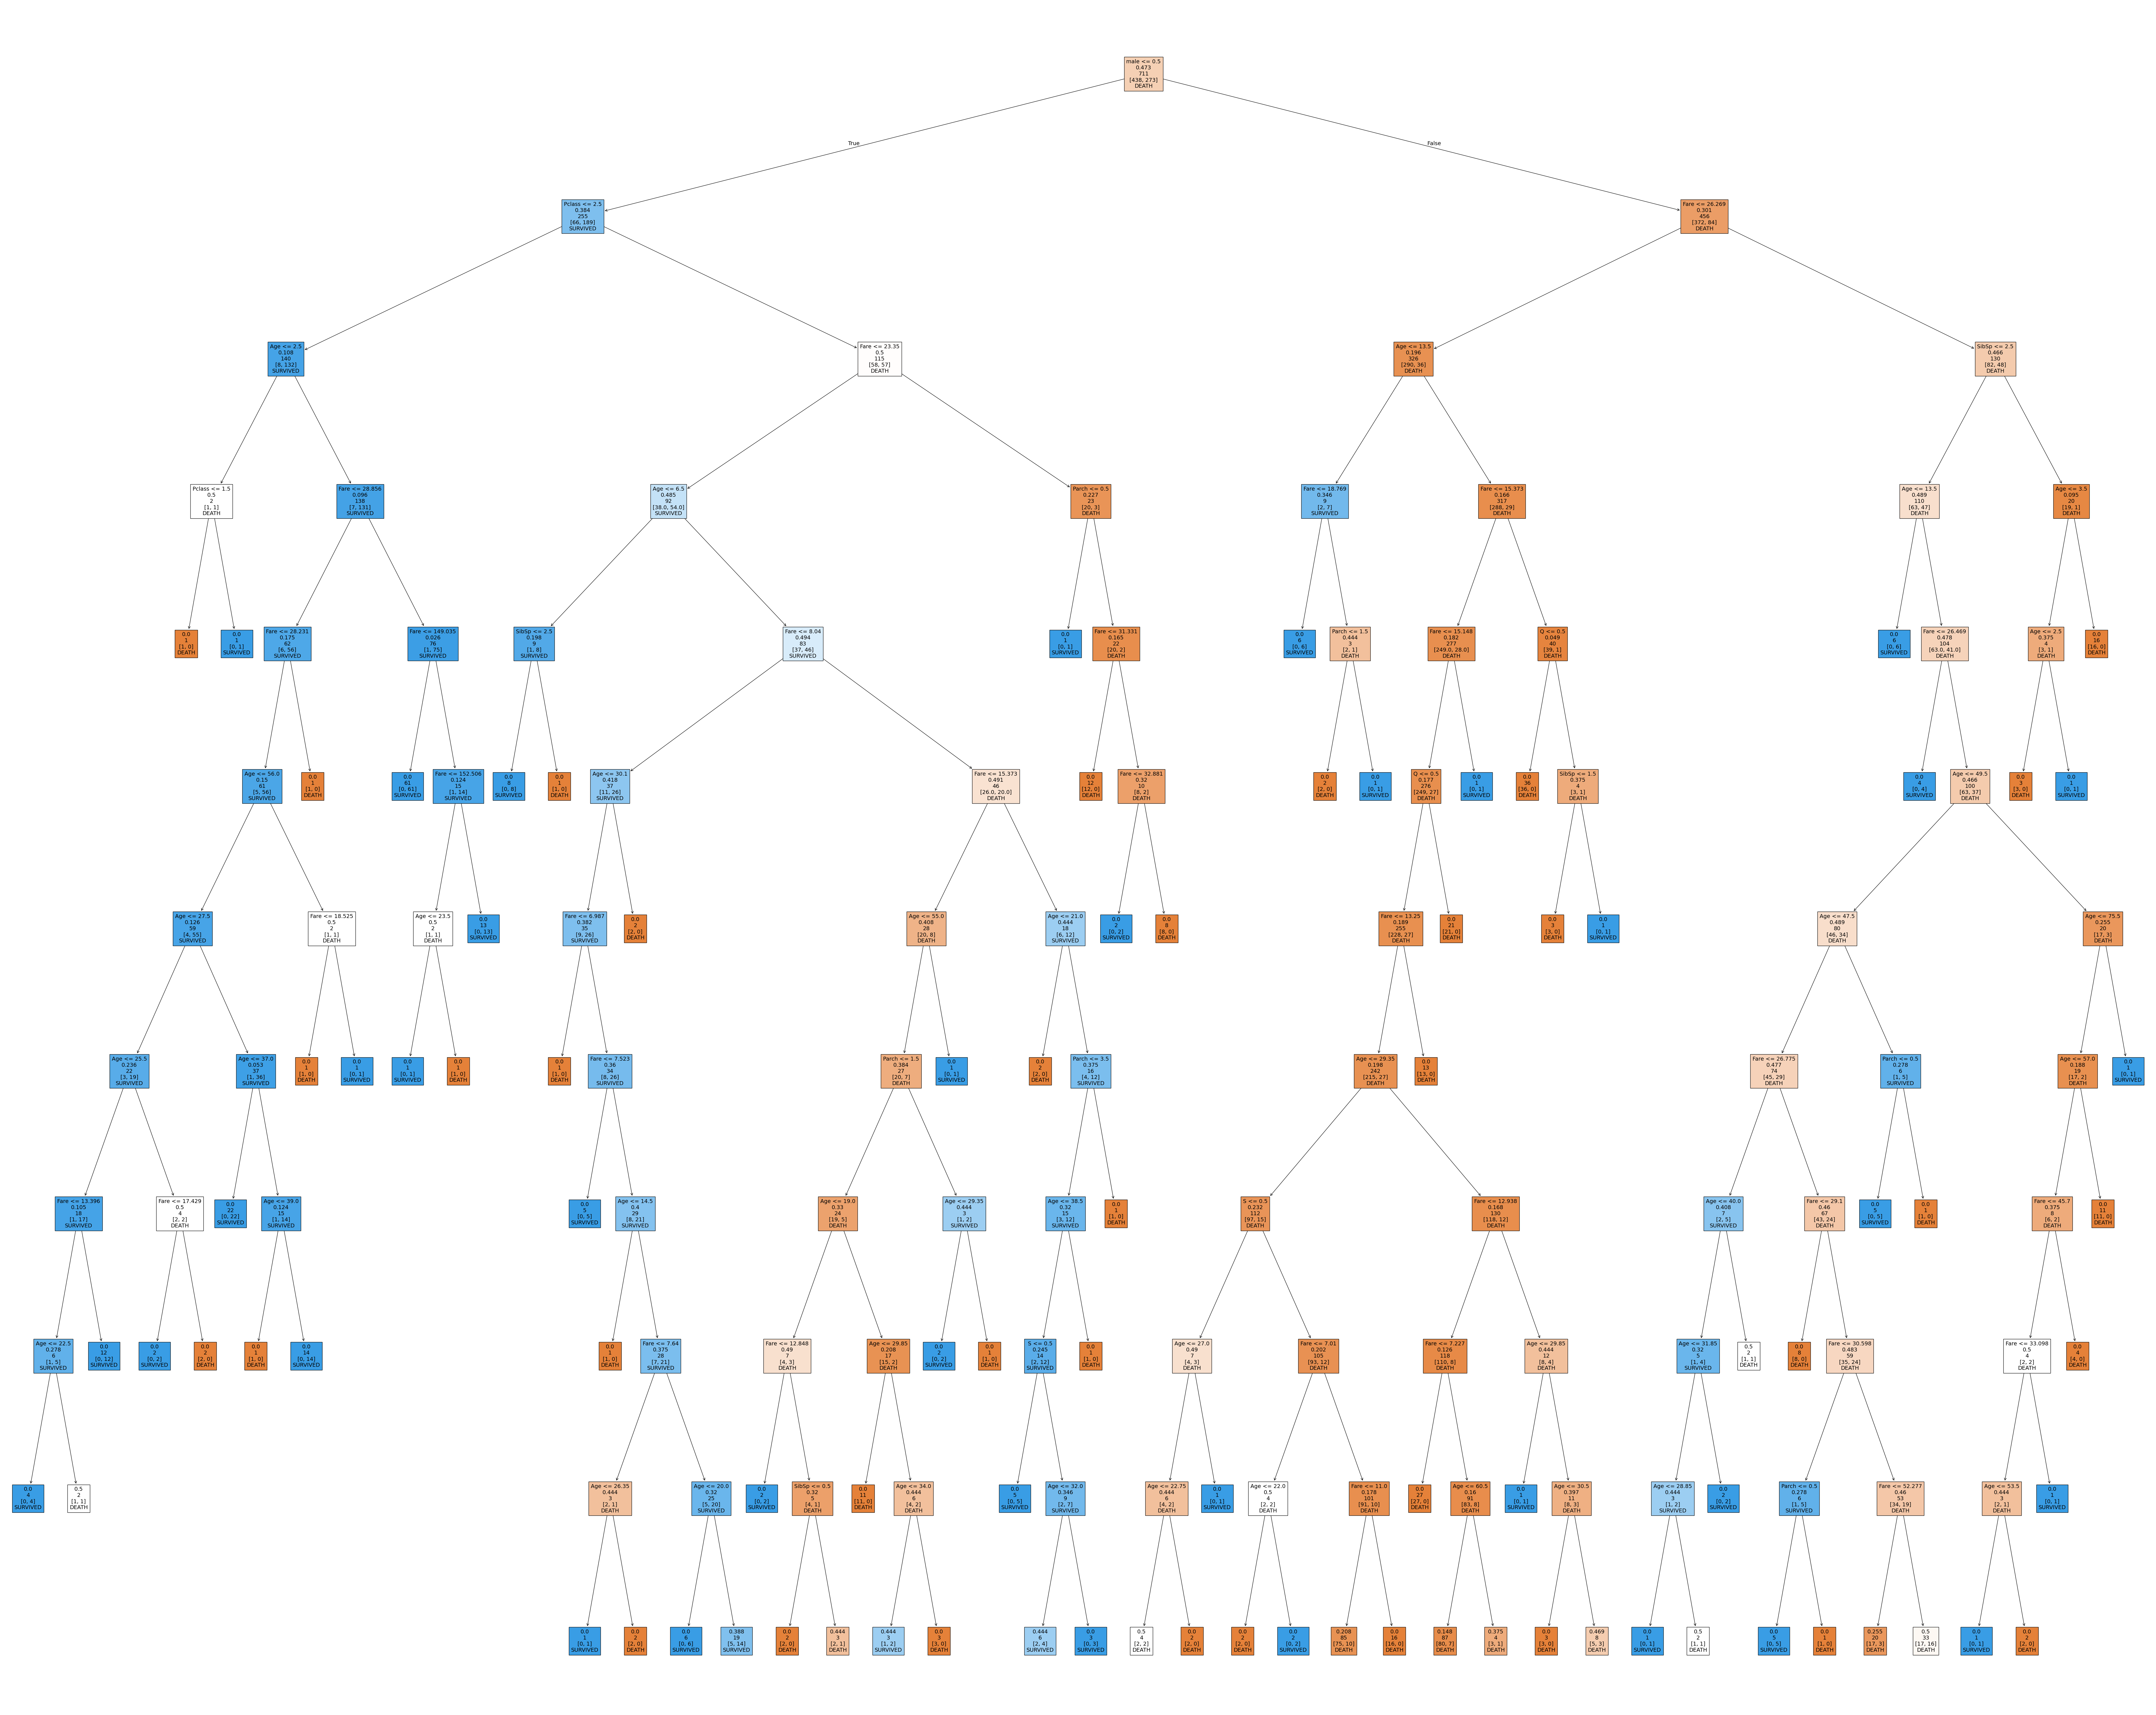

In [97]:
from sklearn.tree import plot_tree
import matplotlib.pyplot
# feature_names -> all the data except the column "survived"
# class_name =  Asc data (0, 1)

matplotlib.pyplot.figure(figsize=(100,80))
plot_tree(my_decision_tree_model, feature_names=x_training.columns, class_names=["DEATH", "SURVIVED"], filled=True, label='none')